# Visualisation de nos séries temporelles 

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

On importe les librairies habituelles 

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

Les warnings m'embêtent toujours autant ...

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Les Tables fct

On importe nos tables et on les regroupe ensemble :

In [4]:
fct_neurology = pd.read_csv('fct_neurology.csv').drop(['Unnamed: 0'], axis=1)  #Il y a cette colonne qui est bizarre donc je l'enlève
fct_haemodynamic = pd.read_csv('fct_haemodynamic.csv')
fct_respiratory = pd.read_csv('fct_respiratory.csv')
fct_temperature = pd.read_csv('fct_temperature.csv')

dim_patient = pd.read_csv('dim_patient.csv')



dates = dim_patient[['id_patient','date_transplantation']]


In [5]:
p_neuro = pd.merge(fct_neurology, dates, on='id_patient')

p_neuro = p_neuro[p_neuro['time'] != '0']
p_neuro['timestamp'] = p_neuro['date_transplantation'] + '-' +p_neuro['time']


p_neuro['timestamp'] = pd.to_datetime(p_neuro['timestamp'])
p_neuro=p_neuro.drop(['time','date_transplantation'],axis=1)


In [6]:
p_haemo = pd.merge(fct_haemodynamic, dates, on='id_patient')

p_haemo = p_haemo[p_haemo['time'] != '0']
p_haemo['timestamp'] = p_haemo['date_transplantation'] + '-' +p_haemo['time']


p_haemo['timestamp'] = pd.to_datetime(p_haemo['timestamp'])
p_haemo=p_haemo.drop(['time','date_transplantation'],axis=1)

In [7]:

p_respi = pd.merge(fct_respiratory, dates, on='id_patient')

p_respi = p_respi[p_respi['time'] != '0']
p_respi['timestamp'] = p_respi['date_transplantation'] + '-' +p_respi['time']


p_respi['timestamp'] = pd.to_datetime(p_neuro['timestamp'])
p_respi=p_respi.drop(['time','date_transplantation'],axis=1)

In [8]:
p_tempera = pd.merge(fct_temperature, dates, on='id_patient')

p_tempera = p_tempera[p_tempera['time'] != '0']
p_tempera['timestamp'] = p_tempera['date_transplantation'] + '-' +p_tempera['time']


p_tempera['timestamp'] = pd.to_datetime(p_tempera['timestamp'])
p_tempera=p_tempera.drop(['time','date_transplantation'],axis=1)

In [9]:
neuro_id_patient=p_neuro['id_patient'].unique()
haemo_id_patient=p_haemo['id_patient'].unique() 
respi_id_patient=p_respi['id_patient'].unique() 
tempera_id_patient=p_tempera['id_patient'].unique() 

In [10]:
neuro_col=p_neuro.drop(['id_patient','timestamp'],axis=1).columns 
haemo_col=p_haemo.drop(['id_patient','timestamp'],axis=1).columns  
respi_col=p_respi.drop(['id_patient','timestamp'],axis=1).columns  
tempera_col=p_tempera.drop(['id_patient','timestamp'],axis=1).columns 

### Ici je fais une fonction qui automatise le plot des séries temps pour nos tables fct :

In [11]:
def plot_serie_patient(table,patient_id,variable) :
    # On choisit une table parmi p_neuro, p_haemo,p_respi ou p_tempera
    # On prend ensuit le patient que l'on choisit dans table_id_patient parmis les 4 créées au dessus
    # On choisit la variable à observer dans table_col au dessus 
    df=table[table['id_patient']==patient_id].sort_values('timestamp') ;
    df['timestamp']-=df['timestamp'].iloc[0] ; # Ici j'initialise le temps à 0. Càd le début est à 0.
    df=df.set_index('timestamp') ;
    plt.title('Evolution de la variable "'+variable+'" du patient '+str(patient_id)+"| Durée de l'opération : "+str(df.index[-1]), y=1.05, size=25)
    plt.plot(df[variable])

Un example avec le patient 381 et la série temporelle associée à BIS :

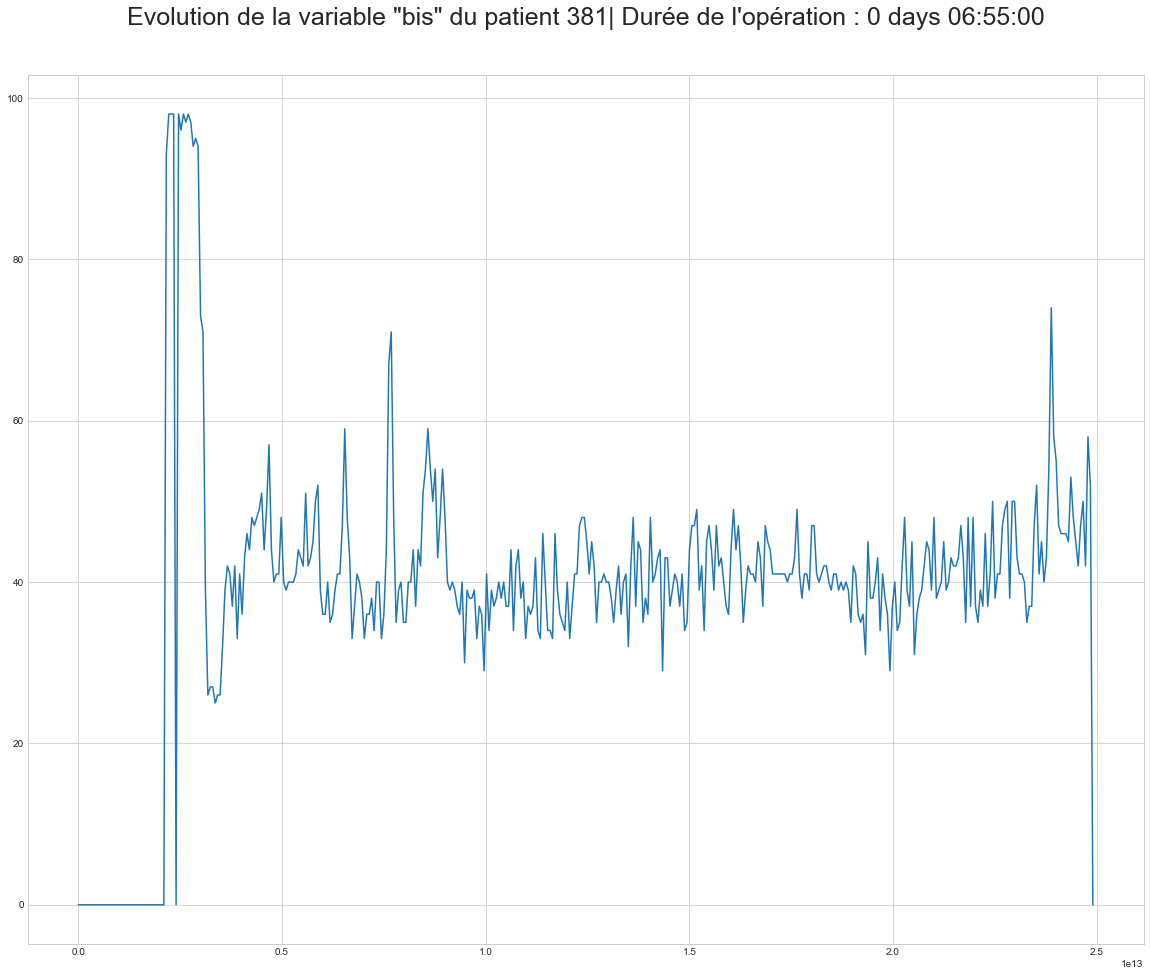

In [12]:
fig = plt.figure(figsize=(20,16))
plot_serie_patient(p_neuro,381,'bis')

## VISUALISER FACILEMENT LES VARIABLES ICI !

Pour résumer :

-On choisit une table. (table= p_neuro ou p_haemo ou p_respi ou p_tempera)

-On choisit un patient dans table_id_patient

-On choisit une variable dans table_col

Par exemple ici on regarde la table p_respi

In [13]:
respi_id_patient

array([329.0, 323.0, 316.0, 301.0, 326.0, 311.0, 330.0, 319.0, 328.0,
       314.0, 312.0, 320.0, 327.0, 305.0, 325.0, 302.0, 315.0, 300.0,
       309.0, 322.0, 318.0, 304.0, 308.0, 349.0, 351.0, 333.0, 354.0,
       347.0, 357.0, 338.0, 346.0, 358.0, 109.0, 344.0, 359.0, 361.0,
       360.0, 334.0, 355.0, 342.0, 343.0, 335.0, 337.0, 336.0, 331.0,
       352.0, 340.0, 356.0, 381.0, 384.0, 372.0, 377.0, 370.0, 389.0,
       388.0, 383.0, 373.0, 375.0, 382.0, 368.0, 371.0, 390.0, 369.0,
       386.0, 379.0, 376.0, 362.0, 378.0, 391.0, 367.0, 387.0, 363.0,
       364.0, 380.0, 366.0, 392.0, 393.0, 407.0, 404.0, 398.0, 400.0,
       399.0, 403.0, 411.0, 410.0, 394.0, 405.0, 401.0, 397.0, 395.0,
       408.0, 409.0, 406.0, 396.0], dtype=object)

In [14]:
respi_col

Index(['Unnamed: 0', 'etco2', 'eto2', 'fico2', 'fin2o', 'fr', 'fr_ecg', 'fio2',
       'mac', 'peeptotal', 'pmax', 'pmean', 'pplat', 'rr_co2', 'spo2',
       'svo2__m', 'vt'],
      dtype='object')

On choisit de regarder 'rr_co2' du patient 411

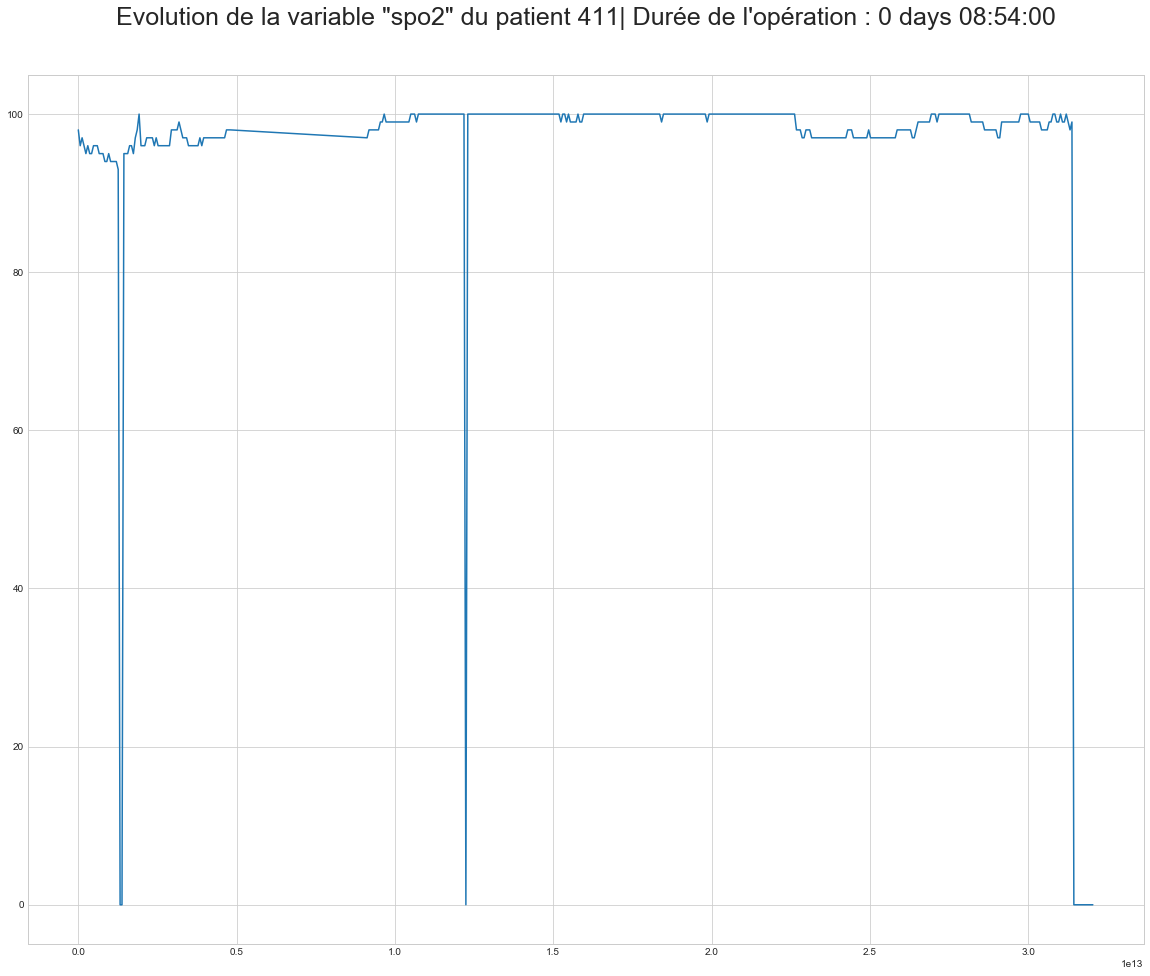

In [15]:
fig = plt.figure(figsize=(20,16))
plot_serie_patient(p_respi,411,'spo2')

Maintenant il faudrait analyser tout ça !